# Spoonacular API Calls

___

### Table Of Contents

1. [Import_Libraries](#Import_Libraries)
2. [Expand_maximum_range_of_rows](#Expand_maximum_range_of_rows)
3. [Understanding_the_Spoonacular_API_documentation](#Understanding_the_Spoonacular_API_documentation)
4. [Test_A_Call_To_Spoonacular_API](#Test_A_Call_To_Spoonacular_API)
5. [Testing_API_Calls_For_Recipes_Sorted_By_'Popularity'](#Testing_API_Calls_For_Recipes_Sorted_By_'Popularity')
6. [Make_API_Calls_For_Top_1,000_Recipes_Sorted_By_'Popularity](#Make_API_Calls_For_Top_1,000_Recipes_Sorted_By_'Popularity')

### 1. Import Libraries
<a name="Import_Libraries"></a>

In [1]:
%run ../Py_Files/imports.py
%matplotlib inline

___

### 2. Expand maximum range of rows
<a name="Expand_maximum_range_of_rows"></a>

Lots of incoming data from the Spoonacular API.<br>
It is probably a good idea to expand the max range of rows/columns/width to view in Pandas to 1000.<br>

In [2]:
%run ../Py_Files/max_range.py

___

### 3. Understanding the Spoonacular API documentation
<a name="Understanding_the_Spoonacular_API_documentation"></a>

Documentation for the Wordtracker API:<br> 
https://spoonacular.com/food-api/docs

#### Identify All GET Endpoints (No PATCH, POST, PUT, or DELETE)

- <b>RECIPES</b>
    - recipes/search
    - /recipes/findByNutrients
    - /recipes/findByIngredients
    - /recipes/complexSearch
    - /recipes/{id}/information
    - /recipes/informationBulk
    - /recipes/{id}/similar
    - /recipes/random
    - /recipes/autocomplete
    - /recipes/{id}/equipmentWidget.json
    - /recipes/{id}/priceBreakdownWidget.json
    - /recipes/{id}/ingredientWidget.json
    - /recipes/{id}/nutritionWidget.json
    - /recipes/{id}/analyzedInstructions
    - /recipes/extract
    - /recipes/{id}/summary
    - /recipes/queries/analyze
    - /recipes/guessNutrition
    
    
- <b>INGREDIENTS</b>
    - /food/ingredients/{id}/information
    - /recipes/convert
    - /food/ingredients/autocomplete
    - /food/ingredients/substitutes
    - /food/ingredients/{id}/substitutes
    
    
- <b>PRODUCTS</b>
    - /food/products/search
    - /food/products/upc/{upc}
    - /food/products/{id}
    - /food/products/upc/{upc}/comparable
    - /food/products/suggest
    
    
- <b>MENU ITEMS</b>
    - /food/menuItems/search
    - /food/menuItems/{id}
    - /food/menuItems/suggest
    
    
- <b>MEAL PLANS</b>
    - /recipes/mealplans/generate
    
    
- <b>WINE</b>
    - /food/wine/dishes
    - /food/wine/pairing
    - /food/wine/description
    - /food/wine/recommendation
    
    
- <b>MISC</b>
    - /recipes/quickAnswer
    - /food/detect
    - /food/site/search
    - /food/videos/search
    - /food/jokes/random
    - /food/trivia/random
    - /food/converse
    - /food/converse/suggest
    
    
- <b>WIDGETS</b>
    - /recipes/{id}/ingredientWidget
    - /recipes/{id}/equipmentWidget
    - /recipes/{id}/priceBreakdownWidget
    - /recipes/{id}/nutritionWidget
    - /recipes/visualizeNutrition
    - /recipes/visualizePriceEstimator
    - /recipes/visualizeEquipment
    - /recipes/visualizeIngredients
    - /food/products/{id}/nutritionWidget
    - /food/menuItems/{id}/nutritionWidget
    - /recipes/visualizeRecipe

#### Identify <u>critical</u> GET endpoints and describe them

- <b>RECIPES</b>
    - <b>recipes/search</b>
        - Spoonacular recipe API includes over 360,000 recipes as well as an open source recipe database. Consider using the "Search Recipes Complex" endpoint for much more flexibility.
    - <b>/recipes/findByNutrients</b>
        - Find a set of recipes that adhere to the given nutritional limits. You may set limits for macronutrients (calories, protein, fat, and carbohydrate) and/or many micronutrients.
    - <b>/recipes/findByIngredients</b>
        - Ever wondered what recipes you can cook with the ingredients you have in your fridge or pantry? This endpoint lets you find recipes that either maximize the usage of ingredients you have at hand (pre shopping) or minimize the ingredients that you don't currently have (post shopping). Find recipes that use as many of the given ingredients as possible and require as few additional ingredients as possible. This is a "what's in your fridge" API endpoint.
    - <b>/recipes/complexSearch</b>
        - Search through hundreds of thousands of recipes using advanced filtering and ranking. NOTE: This method combines searching by query, by ingredients, and by nutrients into one endpoint. <b>USE THIS ENDPOINT TO CALL RECIPES SORTED BY POPULARITY ("LIKES")
    - <b>/recipes/{id}/information</b>
        - Use a recipe id to get full information about a recipe, such as ingredients, nutrition, diet and allergen information, etc.
    - <b>/recipes/informationBulk</b>
        - Get information about multiple recipes at once. This is equivalent to calling the Get Recipe Information endpoint multiple times, but faster.
    - <b>/recipes/{id}/similar</b>
        - Find recipes which are similar to the given one.
    - <b>/recipes/{id}/summary</b>
        - Automatically generate a short description that summarizes key information about the recipe.
    
    
- <b>INGREDIENTS</b>
    - <b>/food/ingredients/{id}/information</b>
        - Use an ingredient id to get all available information about an ingredient, such as its image and supermarket aisle.
    - <b>/food/ingredients/substitutes</b>
        - Search for substitutes for a given ingredient.
    
    
- <b>PRODUCTS</b>
    - <b>/food/products/search</b>
        - Search packaged food products, such as frozen pizza or Greek yogurt.
    - <b>/food/products/{id}</b>
        - Use a product id to get full information about a product, such as ingredients, nutrition, etc.
    
    
- <b>MENU ITEMS</b>
    - <b>/food/menuItems/search</b>
        - Search over 115,000 menu items from over 800 fast food and chain restaurants. For example, McDonald's Big Mac or Starbucks Mocha.
            - <b>/food/menuItems/{id}</b>
        - Use a menu item id to get all available information about a menu item, such as nutrition.
            - <b>/food/menuItems/suggest</b>
        - Generate suggestions for menu items based on a (partial) query. The matches will be found by looking in the title only.

___

### 4. Test A Call To Spoonacular API
<a name="Test_A_Call_To_Spoonacular_API"></a>

#### Get a recipe

Test a call to the <b>/recipes/search</b> endpoint to make sure we can return a recipe.

In [93]:
response_1_name = requests.get('https://api.spoonacular.com/recipes/search?query=Kale+and+Quinoa+Salad&number=1&apiKey=YOUR_API_KEY')
example_recipe_name = response_1_name.json()
example_recipe_name

{'results': [{'id': 617707,
   'title': 'Quinoa & Kale Salad',
   'readyInMinutes': 20,
   'servings': 4,
   'image': 'Quinoa---Kale-Salad-617707.jpg',
   'imageUrls': ['Quinoa---Kale-Salad-617707.jpg']}],
 'baseUri': 'https://spoonacular.com/recipeImages/',
 'offset': 0,
 'number': 1,
 'totalResults': 57,
 'processingTimeMs': 72,
 'expires': 1579484832484,
 'isStale': False}

#### Get more detailed information about this recipe.

Test a call to the <b>/recipes/{id}/information</b> endpoint to make sure we can use the "id" number provided to return more detailed information about this "Kale and Quinoa Salad with Black Beans" recipe that we got above.

In [94]:
response_1_info = requests.get('https://api.spoonacular.com/recipes/592479/information?includeNutrition=true&apiKey=YOUR_API_KEY')
example_recipe_info = response_1_info.json()
example_recipe_info

{'vegetarian': True,
 'vegan': True,
 'glutenFree': True,
 'dairyFree': True,
 'veryHealthy': True,
 'cheap': False,
 'veryPopular': True,
 'sustainable': False,
 'weightWatcherSmartPoints': 6,
 'gaps': 'no',
 'lowFodmap': False,
 'ketogenic': False,
 'whole30': False,
 'preparationMinutes': 25,
 'cookingMinutes': 25,
 'sourceUrl': 'http://blog.fatfreevegan.com/2013/06/kale-and-quinoa-salad-with-black-beans.html',
 'spoonacularSourceUrl': 'https://spoonacular.com/kale-and-quinoa-salad-with-black-beans-592479',
 'aggregateLikes': 50078,
 'spoonacularScore': 100.0,
 'healthScore': 100.0,
 'creditsText': 'Fat Free Vegan',
 'sourceName': 'Fat Free Vegan',
 'pricePerServing': 101.23,
 'extendedIngredients': [{'id': 1022009,
   'aisle': 'Ethnic Foods;Spices and Seasonings',
   'image': 'chili-powder.jpg',
   'consitency': 'solid',
   'name': 'ancho chile powder',
   'original': '1 teaspoon ancho chile powder (or other pure chile powder, not a blend)',
   'originalString': '1 teaspoon ancho c

#### Explore what kind of information that we can get out of here.

In [99]:
#what are the keys of our dictionary?
example_recipe_info_keys = list(example_recipe_info.keys())
example_recipe_info_keys

['vegetarian',
 'vegan',
 'glutenFree',
 'dairyFree',
 'veryHealthy',
 'cheap',
 'veryPopular',
 'sustainable',
 'weightWatcherSmartPoints',
 'gaps',
 'lowFodmap',
 'ketogenic',
 'whole30',
 'preparationMinutes',
 'cookingMinutes',
 'sourceUrl',
 'spoonacularSourceUrl',
 'aggregateLikes',
 'spoonacularScore',
 'healthScore',
 'creditsText',
 'sourceName',
 'pricePerServing',
 'extendedIngredients',
 'id',
 'title',
 'readyInMinutes',
 'servings',
 'image',
 'imageType',
 'nutrition',
 'cuisines',
 'dishTypes',
 'diets',
 'occasions',
 'winePairing',
 'instructions',
 'analyzedInstructions']

In [100]:
#The unique id for the recipe.
example_recipe_info['id']

592479

In [103]:
# Num ingredients
print("Number of ingredients:", len(example_recipe_info['extendedIngredients']), '\n')

# List ingredients
ing_list = []
for index, val in enumerate(example_recipe_info['extendedIngredients']):
    ing_name = example_recipe_info['extendedIngredients'][index]['name']
    ing_list.append(ing_name)
print("Ingredients List:", ing_list, '\n')

# Ingredient types
ing_type_list = []
for index, val in enumerate(example_recipe_info['extendedIngredients']):
    ing_type = example_recipe_info['extendedIngredients'][index]['aisle']
    ing_type_list.append(ing_type)
ing_type_counts = dict(zip(Counter(ing_type_list).keys(), Counter(ing_type_list).values()))
print("Count of Ingredient Types:", ing_type_counts, '\n')

# Num steps
num_steps = len(example_recipe_info['analyzedInstructions'][0]['steps'])
print("Number of Steps:", num_steps, '\n')

# Num words in instructions
num_words = len(example_recipe_info['instructions'].split())
print("Number of Words in Instructions:", num_words, '\n')

Number of ingredients: 15 

Ingredients List: ['ancho chile powder', 'avocado', 'black beans', 'carrot', 'chile powder', 'cumin', 'garlic', 'ground flaxseed', 'kale', 'lemon juice', 'lime juice', 'quinoa', 'red bell pepper', 'salt', 'vegetable broth'] 

Count of Ingredient Types: {'Ethnic Foods;Spices and Seasonings': 1, 'Produce': 7, 'Pasta and Rice;Canned and Jarred': 1, 'Spices and Seasonings': 3, 'Health Foods;Baking': 1, 'Pasta and Rice;Health Foods': 1, 'Canned and Jarred': 1} 

Number of Steps: 8 

Number of Words in Instructions: 186 



In [104]:
# Nutrition
nutrients = []
nutrient_amts = []
for index, val in enumerate(example_recipe_info['nutrition']['nutrients']):
    nutrient_name = example_recipe_info['nutrition']['nutrients'][index]['title']
    nutrients.append(nutrient_name)
    nutrient_amt = example_recipe_info['nutrition']['nutrients'][index]['amount']
    nutrient_amts.append(nutrient_amt)
nutrition_info = dict(zip(nutrients, nutrient_amts))
print("Nutrition:", nutrition_info, '\n')
                                          
# Diets
diets = example_recipe_info['diets']
print("Diets:", diets, '\n')

Nutrition: {'Calories': 242.6, 'Fat': 7.38, 'Saturated Fat': 1.03, 'Carbohydrates': 37.19, 'Sugar': 1.8, 'Cholesterol': 0.0, 'Sodium': 250.66, 'Protein': 9.79, 'Vitamin K': 142.68, 'Vitamin A': 4183.66, 'Vitamin C': 48.48, 'Manganese': 1.01, 'Folate': 160.25, 'Fiber': 8.84, 'Copper': 0.63, 'Magnesium': 111.48, 'Phosphorus': 239.17, 'Vitamin B6': 0.38, 'Potassium': 667.61, 'Vitamin B1': 0.28, 'Iron': 2.98, 'Vitamin B2': 0.21, 'Vitamin E': 1.82, 'Zinc': 1.8, 'Vitamin B5': 0.91, 'Vitamin B3': 1.72, 'Calcium': 69.53, 'Selenium': 3.59} 

Diets: ['gluten free', 'dairy free', 'lacto ovo vegetarian', 'vegan'] 



In [105]:
#How long it takes to prepare the recipe.
print('Recipe Total Time (In Minutes):', example_recipe_info['readyInMinutes'], '\n')

print('Prep Time:', example_recipe_info['preparationMinutes'], '\n')

print('Cooking Time:', example_recipe_info['cookingMinutes'], '\n')

Recipe Total Time (In Minutes): 50 

Prep Time: 25 

Cooking Time: 25 



In [106]:
#Number of "likes" for this recipe.
print('Recipe Number Of Likes')
example_recipe_info['aggregateLikes']

Recipe Number Of Likes


50078

In [107]:
#Spoonacular's "score" for a particular recipe.
print('Recipe Spoonacular Score (0-100)')
example_recipe_info['spoonacularScore']

Recipe Spoonacular Score (0-100)


100.0

In [108]:
#Price per serving (in cents)
print('Price Per Serving (In Cents)')
example_recipe_info['pricePerServing']

Price Per Serving (In Cents)


101.23

In [109]:
print('Number Of Servings')
example_recipe_info['servings']

Number Of Servings


6

In [110]:
#It looks like Spoonacular is measuring "price" in cents.
#We need to divide by 100 to get price in dollars.
total_price = example_recipe_info['servings'] * example_recipe_info['pricePerServing']
print('Total Price For Recipe (In Dollars)')
round(total_price / 100,2)

Total Price For Recipe (In Dollars)


6.07

In [113]:
#Let's see what the /recipes/{id}/summary endpoint gets us.
#It looks like just a messy verbal description combining all the
#raw data in the /recipes/{id}/information endpoint.

response_1_summary = requests.get('https://api.spoonacular.com/recipes/592479/summary?&apiKey=YOUR_API_KEY')
example_recipe_summary = response_1_summary.json()
example_recipe_summary

{'id': 592479,
 'title': 'Kale and Quinoa Salad with Black Beans',
 'summary': 'The recipe Kale and Quinoa Salad with Black Beans can be made <b>in about 50 minutes</b>. For <b>$1.01 per serving</b>, you get a side dish that serves 6. One portion of this dish contains approximately <b>10g of protein</b>, <b>7g of fat</b>, and a total of <b>243 calories</b>. If you have ancho chile powder, chile powder, vegetable broth, and a few other ingredients on hand, you can make it. This recipe is liked by 50078 foodies and cooks. It is a good option if you\'re following a <b>gluten free, dairy free, lacto ovo vegetarian, and vegan</b> diet. It is brought to you by blog.fatfreevegan.com. Overall, this recipe earns an <b>outstanding spoonacular score of 100%</b>. Users who liked this recipe also liked <a href="https://spoonacular.com/recipes/skip-the-rice-and-try-quinoa-mexican-quinoa-salad-with-black-beans-and-corn-530227">Skip the Rice and Try Quinoa – Mexican Quinoa Salad with Black Beans and C

In [114]:
#cleaning up this response ^
example_recipe_summary['summary'].replace('</b>','').replace('<b>','').replace('<', '').replace('>','').replace('//','').replace('href="https:spoonacular.com/recipes/skip-the-rice-and-try-quinoa-mexican-quinoa-salad-with-black-beans-and-corn-530227"','').replace('href="https:spoonacular.com/recipes/black-quinoa-kale-salad-15436"','').replace(' Try a Skip the Rice and Try Quinoa – Mexican Quinoa Salad with Black Beans and Corn/a, a Black Quinoa & Kale Salad/a, and a href="https:spoonacular.com/recipes/black-quinoa-kale-salad-42466"Black Quinoa & Kale Salad/a for similar recipes.','')

'The recipe Kale and Quinoa Salad with Black Beans can be made in about 50 minutes. For $1.01 per serving, you get a side dish that serves 6. One portion of this dish contains approximately 10g of protein, 7g of fat, and a total of 243 calories. If you have ancho chile powder, chile powder, vegetable broth, and a few other ingredients on hand, you can make it. This recipe is liked by 50078 foodies and cooks. It is a good option if you\'re following a gluten free, dairy free, lacto ovo vegetarian, and vegan diet. It is brought to you by blog.fatfreevegan.com. Overall, this recipe earns an outstanding spoonacular score of 100%. Users who liked this recipe also liked a Skip the Rice and Try Quinoa – Mexican Quinoa Salad with Black Beans and Corn/a, a href="https:spoonacular.com/recipes/black-quinoa-kale-salad-42466"Black Quinoa & Kale Salad/a, and a Black Quinoa & Kale Salad/a.'

___

### 5. Testing API Calls For Recipes Sorted By "Popularity"
<a name="Testing_API_Calls_For_Recipes_Sorted_By_'Popularity'"></a>

#### Steps:
1. Test calling 1 recipe sorted by most popular in descending order using the /recipes/searchComplex endpoint, with "addRecipeInformation" set to "true". This should return the most popular recipe, and give us all of the information that we need about a recipe.

    - <b>Result: SUCCESS/FAIL. Most popular recipe was returned. But unfortunately, it looks like "addRecipeInformation = true" does not return all nutrient / caloric information that we need...so we will need to do a separate API call for each recipe's "information" and merge by recipe "ID" later on.<b>


2. Test calling 10 recipes sorted by most popular in descending order using the /recipes/searchComplex endpoint, with "addRecipeInformation" set to "false". 

    - <b>Result: SUCCESS. Top 10 recipes sorted by most popular in descending order.<b>


3. Test calling 5 recipes sorted by most popular in descending order using the /recipes/searchComplex endpoint, with "offset" set to "5" to see if the top 5 most popular recipes are skipped, and returns the 6-10 most popular recipes instead.

    - <b>Result: SUCCESS. Top 1-5 recipes were skipped as desired. Top 6-10 recipes sorted by most popular in descending order was returned. <b>


4. Test calling 1 recipe sorted by most popular in descending order using the /recipes/searchComplex endpoint, with "offset" set to "1000" to see if the 1001th most popular recipe can be found. (Documentation says that the max "offset" is 990...so let's test this.)

    - <b>Result: FAIL. Even though "offset" was set to "1000", the offset maximum is "900" per the result. This means we will only be able to call the top 1,000 recipes sorted by popularity.<b>


5. Test calling 200 recipes sorted by most popular in descending order using the /recipes/searchComplex endpoint, with "addRecipeInformation" set to "false". This will tell us if we can call more than 100 results at a time (restriction of 10 results imposed on the API documentation...but RapidAPI says 100 results...so just want to test this to see if we can call more at a time.)

    - <b>Result: FAIL. Even though "number" was set to "200", the number of results returned maximum is "100" per the result. This means we will only be able to call 100 recipes per call. We will need to write a "for" loop to get information out more efficiently.<b>

#### Step 1

In [5]:
url = "https://spoonacular-recipe-food-nutrition-v1.p.rapidapi.com/recipes/searchComplex"

querystring = {"addRecipeInformation":"true","limitLicense":"false","offset":"0","number":"1", "sort":"popularity", "sortDirection":"desc", "includeNutrition":"true"}

headers = {
    'x-rapidapi-host': "spoonacular-recipe-food-nutrition-v1.p.rapidapi.com",
    'x-rapidapi-key': "YOUR_API_KEY"
    }

response_test_1 = requests.request("GET", url, headers=headers, params=querystring)
popular_recipes_1 = response_test_1.json()
popular_recipes_1

#SUCCESS / FAIL. 
#This is the most popular recipe.
#unfortunately, it looks like "addRecipeInformation = true" does not return all nutrient / caloric information...
#so we will need to do a separate API call for each recipe's "information" and merge later on.

{'results': [{'vegetarian': True,
   'vegan': True,
   'glutenFree': True,
   'dairyFree': True,
   'veryHealthy': True,
   'cheap': False,
   'veryPopular': True,
   'sustainable': False,
   'weightWatcherSmartPoints': 6,
   'gaps': 'no',
   'lowFodmap': False,
   'ketogenic': False,
   'whole30': False,
   'preparationMinutes': 25,
   'cookingMinutes': 25,
   'sourceUrl': 'http://blog.fatfreevegan.com/2013/06/kale-and-quinoa-salad-with-black-beans.html',
   'spoonacularSourceUrl': 'https://spoonacular.com/kale-and-quinoa-salad-with-black-beans-592479',
   'aggregateLikes': 50078,
   'spoonacularScore': 100.0,
   'healthScore': 100.0,
   'creditsText': 'Fat Free Vegan',
   'sourceName': 'Fat Free Vegan',
   'pricePerServing': 101.23,
   'id': 592479,
   'title': 'Kale and Quinoa Salad with Black Beans',
   'readyInMinutes': 50,
   'servings': 6,
   'image': 'https://spoonacular.com/recipeImages/592479-312x231.jpg',
   'imageType': 'jpg',
   'cuisines': [],
   'dishTypes': ['side dish'

#### Step 2

In [6]:
url = "https://spoonacular-recipe-food-nutrition-v1.p.rapidapi.com/recipes/searchComplex"

querystring = {"addRecipeInformation":"false","limitLicense":"false","offset":"0","number":"10", "sort":"popularity", "sortDirection":"desc"}

headers = {
    'x-rapidapi-host': "spoonacular-recipe-food-nutrition-v1.p.rapidapi.com",
    'x-rapidapi-key': "YOUR_API_KEY"
    }

response_test_2 = requests.request("GET", url, headers=headers, params=querystring)
popular_recipes_2 = response_test_2.json()
popular_recipes_2

#SUCCESS! 
#Top 10 most popular recipes returned.

{'results': [{'id': 592479,
   'title': 'Kale and Quinoa Salad with Black Beans',
   'image': 'https://spoonacular.com/recipeImages/592479-312x231.jpg',
   'imageType': 'jpg'},
  {'id': 547775,
   'title': 'Creamy Avocado Pasta',
   'image': 'https://spoonacular.com/recipeImages/547775-312x231.jpg',
   'imageType': 'jpg'},
  {'id': 818941,
   'title': 'Avocado Toast with Eggs, Spinach, and Tomatoes',
   'image': 'https://spoonacular.com/recipeImages/818941-312x231.jpg',
   'imageType': 'jpg'},
  {'id': 495111,
   'title': 'Citrus Sesame Kale',
   'image': 'https://spoonacular.com/recipeImages/495111-312x231.jpg',
   'imageType': 'jpg'},
  {'id': 689502,
   'title': 'Melt In Your Mouth Kale Salad',
   'image': 'https://spoonacular.com/recipeImages/689502-312x231.jpg',
   'imageType': 'jpg'},
  {'id': 837136,
   'title': 'Kale Pineapple Smoothie',
   'image': 'https://spoonacular.com/recipeImages/837136-312x231.jpg',
   'imageType': 'jpg'},
  {'id': 582897,
   'title': 'Mexican Salad wit

#### Step 3

In [7]:
url = "https://spoonacular-recipe-food-nutrition-v1.p.rapidapi.com/recipes/searchComplex"

querystring = {"addRecipeInformation":"false","limitLicense":"false","offset":"5","number":"5", "sort":"popularity", "sortDirection":"desc"}

headers = {
    'x-rapidapi-host': "spoonacular-recipe-food-nutrition-v1.p.rapidapi.com",
    'x-rapidapi-key': "YOUR_API_KEY"
    }

response_test_3 = requests.request("GET", url, headers=headers, params=querystring)
popular_recipes_3 = response_test_3.json()
popular_recipes_3

#SUCCESS!
#top 6-10 most popular recipes
#results should be the following, in this order:

# 1. Kale Pineapple Smoothie
# 2. Mexican Salad with Lime Dressing
# 3. Weekly Meal Plan #17
# 4. Matcha Green Tea and Pineapple Smoothie
# 5. Green Smoothie

{'results': [{'id': 837136,
   'title': 'Kale Pineapple Smoothie',
   'image': 'https://spoonacular.com/recipeImages/837136-312x231.jpg',
   'imageType': 'jpg'},
  {'id': 582897,
   'title': 'Mexican Salad with Lime Dressing',
   'image': 'https://spoonacular.com/recipeImages/582897-312x231.jpg',
   'imageType': 'jpg'},
  {'id': 777037,
   'title': 'Weekly Meal Plan #17',
   'image': 'https://spoonacular.com/recipeImages/777037-312x231.jpg',
   'imageType': 'jpg'},
  {'id': 801710,
   'title': 'Matcha Green Tea and Pineapple Smoothie',
   'image': 'https://spoonacular.com/recipeImages/801710-312x231.jpg',
   'imageType': 'jpg'},
  {'id': 695486,
   'title': 'Green Smoothie',
   'image': 'https://spoonacular.com/recipeImages/695486-312x231.jpg',
   'imageType': 'jpg'}],
 'baseUri': 'https://spoonacular.com/recipeImages/',
 'offset': 5,
 'number': 5,
 'totalResults': 313922,
 'processingTimeMs': 672}

#### Step 4

In [9]:
url = "https://spoonacular-recipe-food-nutrition-v1.p.rapidapi.com/recipes/searchComplex"

querystring = {"addRecipeInformation":"false","limitLicense":"false","offset":"1000","number":"1", "sort":"popularity", "sortDirection":"desc"}

headers = {
    'x-rapidapi-host': "spoonacular-recipe-food-nutrition-v1.p.rapidapi.com",
    'x-rapidapi-key': "YOUR_API_KEY"
    }

response_test_4 = requests.request("GET", url, headers=headers, params=querystring)
popular_recipes_4 = response_test_4.json()
popular_recipes_4

#FAIL
#looks like the "max" offest is 900 spots...
#so we can only return a maximum of the top 1000 recipes sorted by popularity on Spoonacular.

{'results': [{'id': 250480,
   'title': 'Vegan Twice Baked Potatoes',
   'image': 'https://spoonacular.com/recipeImages/250480-312x231.jpg',
   'imageType': 'jpg'}],
 'baseUri': 'https://spoonacular.com/recipeImages/',
 'offset': 900,
 'number': 1,
 'totalResults': 313922,
 'processingTimeMs': 683}

#### Step 5

In [10]:
url = "https://spoonacular-recipe-food-nutrition-v1.p.rapidapi.com/recipes/searchComplex"

querystring = {"addRecipeInformation":"false","limitLicense":"false","offset":"0","number":"200", "sort":"popularity", "sortDirection":"desc"}

headers = {
    'x-rapidapi-host': "spoonacular-recipe-food-nutrition-v1.p.rapidapi.com",
    'x-rapidapi-key': "YOUR_API_KEY"
    }

response_test_5 = requests.request("GET", url, headers=headers, params=querystring)
popular_recipes_5 = response_test_5.json()
popular_recipes_5

#FAIL
#Even though we only provided "number = 200", the API only returned 100 results.
#So it looks like we can only call 100 results at a time maximum.

{'results': [{'id': 592479,
   'title': 'Kale and Quinoa Salad with Black Beans',
   'image': 'https://spoonacular.com/recipeImages/592479-312x231.jpg',
   'imageType': 'jpg'},
  {'id': 547775,
   'title': 'Creamy Avocado Pasta',
   'image': 'https://spoonacular.com/recipeImages/547775-312x231.jpg',
   'imageType': 'jpg'},
  {'id': 818941,
   'title': 'Avocado Toast with Eggs, Spinach, and Tomatoes',
   'image': 'https://spoonacular.com/recipeImages/818941-312x231.jpg',
   'imageType': 'jpg'},
  {'id': 495111,
   'title': 'Citrus Sesame Kale',
   'image': 'https://spoonacular.com/recipeImages/495111-312x231.jpg',
   'imageType': 'jpg'},
  {'id': 689502,
   'title': 'Melt In Your Mouth Kale Salad',
   'image': 'https://spoonacular.com/recipeImages/689502-312x231.jpg',
   'imageType': 'jpg'},
  {'id': 837136,
   'title': 'Kale Pineapple Smoothie',
   'image': 'https://spoonacular.com/recipeImages/837136-312x231.jpg',
   'imageType': 'jpg'},
  {'id': 582897,
   'title': 'Mexican Salad wit

___

### 6. Make API Calls For Top 1,000 Recipes Sorted By "Popularity"
<a name="Make_API_Calls_For_Top_1,000_Recipes_Sorted_By_'Popularity'"></a>

#### API limits for "student" plan:
- 20,000 results / day
- 5,000 requests / day
- 50,000 tinyrequests / day

In [3]:
offsets = list(range(0,1000,100))
offsets

[0, 100, 200, 300, 400, 500, 600, 700, 800, 900]

In [18]:
top_1000_recipes = []

In [20]:
#get top 1000 recipes
for number in offsets:

    url = "https://spoonacular-recipe-food-nutrition-v1.p.rapidapi.com/recipes/searchComplex"

    querystring = {
        "addRecipeInformation":"false",
        "limitLicense":"false",
        "offset":number,
        "number":"100", 
        "sort":"popularity", 
        "sortDirection":"desc"
    }

    headers = {
        'x-rapidapi-host': "spoonacular-recipe-food-nutrition-v1.p.rapidapi.com",
        'x-rapidapi-key': "YOUR_API_KEY"
    }

    response_popular = requests.request("GET", url, headers=headers, params=querystring)
    call_100_recipes = response_popular.json()
    top_1000_recipes.append(call_100_recipes)

In [4]:
random_1000_recipes = []
#get random 1000 recipes
for number in offsets:

    url = "https://spoonacular-recipe-food-nutrition-v1.p.rapidapi.com/recipes/searchComplex"

    querystring = {
        "addRecipeInformation":"false",
        "limitLicense":"false",
        "offset":number,
        "number":"100", 
        "sort":"random", 
    }

    headers = {
        'x-rapidapi-host': "spoonacular-recipe-food-nutrition-v1.p.rapidapi.com",
        'x-rapidapi-key': "e1834ce5c0mshd672556248feb69p18ef70jsncbd79662d6cb"
    }

    response_popular = requests.request("GET", url, headers=headers, params=querystring)
    rand_100_recipes = response_popular.json()
    random_1000_recipes.append(rand_100_recipes)

#### Save out the data as a .json file

In [86]:
#save out .json file for safe keeping

# import json
# with open('top_1000_recipes.json', 'w', encoding='utf-8') as f:
#     json.dump(top_1000_recipes, f, ensure_ascii=False, indent=4)

In [20]:
#Now we need to get all 1000 "id" numbers for each recipe, to get detailed information for each.
#Here's an example of what we need to extract:
random_1000_recipes[0]['results'][0]['id']

592479

In [21]:
#Assign all 10 calls of 100 recipes to a single list
rand_ids = []
for index, value in enumerate(random_1000_recipes):
    rand_100 = value['results']
    for ind, val in enumerate(rand_100):
        idnum = val['id']
        rand_ids.append(idnum)

In [ ]:
rand_ids_str = ','.join(map(str, rand_ids))

In [47]:
len(rand_ids_str)

6997

In [48]:
rand_100_ids, rand_200_ids, rand_300_ids = rand_ids_str[:700], rand_ids_str[701:1400], rand_ids_str[1401:2100]
rand_400_ids, rand_500_ids, rand_600_ids = rand_ids_str[2101:2800], rand_ids_str[2801:3500], rand_ids_str[3501:4200]
rand_700_ids, rand_800_ids, rand_900_ids = rand_ids_str[4201:4900], rand_ids_str[4901:5600], rand_ids_str[5601:6300]
rand_1000_ids = rand_ids_str[6301:7000]

In [54]:
rand_ids_list_of_10 = [rand_100_ids, rand_200_ids,rand_300_ids,rand_400_ids,rand_500_ids,
                      rand_600_ids,rand_700_ids,rand_800_ids,rand_900_ids,rand_1000_ids]

In [55]:
rand_ids_list_of_10[0][:7]

'592479,'

In [56]:
rand_1000_recipes_info = []

In [58]:
#get all recipe information by id:
for string_100_ids in rand_ids_list_of_10:
    
    url = "https://spoonacular-recipe-food-nutrition-v1.p.rapidapi.com/recipes/informationBulk"

    querystring = {"includeNutrition":"true","ids":string_100_ids}

    headers = {
        'x-rapidapi-host': "spoonacular-recipe-food-nutrition-v1.p.rapidapi.com",
        'x-rapidapi-key': "e1834ce5c0mshd672556248feb69p18ef70jsncbd79662d6cb"
        }

    response_random_info = requests.request("GET", url, headers=headers, params=querystring)
    call_100_recipes_info = response_random_info.json()
    rand_1000_recipes_info.append(call_100_recipes_info)

In [80]:
rand_1000_recipes_info[0][0]['nutrition']['nutrients'][3]

{'title': 'Carbohydrates',
 'amount': 37.19,
 'unit': 'g',
 'percentOfDailyNeeds': 12.4}

In [ ]:
for rec_list in rand_1000_recipes_info:
    for recipe in rec_list:
#         Add clean nutrition column
        nutrients = []
        nutrient_amts = []
        if type(recipe['nutrition']['nutrients']) == list:
            for index, val in enumerate(recipe['nutrition']['nutrients']):
                nutrient_name = recipe['nutrition']['nutrients'][index]['title']
                nutrients.append(nutrient_name)
                nutrient_amt = recipe['nutrition']['nutrients'][index]['amount']
                nutrient_amts.append(nutrient_amt)
            recipe['nutrition_info'] = dict(zip(nutrients, nutrient_amts))

#             Add num ingredients
        recipe['num_ingredients'] = len(recipe['extendedIngredients'])

columns = ['vegetarian', 'vegan', 'glutenFree', 'dairyFree', 'veryHealthy', 'cheap',
           'veryPopular', 'sustainable', 'ketogenic', 'whole30', 'aggregateLikes',
           'spoonacularScore', 'healthScore', 'pricePerServing', 'extendedIngredients',
           'id', 'title', 'readyInMinutes', 'servings', 'nutrition', 'cuisines', 'dishTypes',
           'diets', 'occasions', 'winePairing', 'instructions', 'analyzedInstructions',
           'preparationMinutes', 'cookingMinutes', 'nutrition_info',
           'num_ingredients']

df = pd.DataFrame(columns = columns)
for ind_10, val in enumerate(data):
    df_new = pd.DataFrame(data[ind_10])
    df = pd.concat([df, df_new])

df.reset_index(drop = True, inplace= True)

numbers = list(range(0,1000))
Calories = []
Fat = []
Saturated_Fat = []
Carbohydrates = []
Sugar = []
Cholesterol = []
Sodium = []
Protein = []
Vitamin_K = []
Vitamin_A = []
Vitamin_C = []
Manganese = []
Folate = []
Fiber = []
Copper = []
Magnesium = []
Phosphorus = []
Vitamin_B6 = []
Potassium = []
Vitamin_B1 = []
Iron = []
Vitamin_B2 = []
Vitamin_E = []
Zinc = []
Vitamin_B5 = []
Vitamin_B3 = []
Calcium = []
Selenium = []
for x in numbers:
    if 'Calories' in df['nutrition_info'][x]:
        Calories.append(df['nutrition_info'][x]['Calories'])
    else:
        Calories.append(0)
for x in numbers:
    if 'Fat' in df['nutrition_info'][x]:
        Fat.append(df['nutrition_info'][x]['Fat'])
    else:
        Fat.append(0)
for x in numbers:
    if 'Saturated Fat' in df['nutrition_info'][x]:
        Saturated_Fat.append(df['nutrition_info'][x]['Saturated Fat'])
    else:
        Saturated_Fat.append(0)
for x in numbers:
    if 'Carbohydrates' in df['nutrition_info'][x]:
        Carbohydrates.append(df['nutrition_info'][x]['Carbohydrates'])
    else:
        Carbohydrates.append(0)
for x in numbers:
    if 'Sugar' in df['nutrition_info'][x]:
        Sugar.append(df['nutrition_info'][x]['Sugar'])
    else:
        Sugar.append(0)
for x in numbers:
    if 'Cholesterol' in df['nutrition_info'][x]:
        Cholesterol.append(df['nutrition_info'][x]['Cholesterol'])
    else:
        Cholesterol.append(0)
for x in numbers:
    if 'Sodium' in df['nutrition_info'][x]:
        Sodium.append(df['nutrition_info'][x]['Sodium'])
    else:
        Sodium.append(0)
for x in numbers:
    if 'Protein' in df['nutrition_info'][x]:
        Protein.append(df['nutrition_info'][x]['Protein'])
    else:
        Protein.append(0)
for x in numbers:
    if 'Vitamin K' in df['nutrition_info'][x]:
        Vitamin_K.append(df['nutrition_info'][x]['Vitamin K'])
    else:
        Vitamin_K.append(0)
for x in numbers:
    if 'Vitamin A' in df['nutrition_info'][x]:
        Vitamin_A.append(df['nutrition_info'][x]['Vitamin A'])
    else:
        Vitamin_A.append(0)
for x in numbers:
    if 'Vitamin C' in df['nutrition_info'][x]:
        Vitamin_C.append(df['nutrition_info'][x]['Vitamin C'])
    else:
        Vitamin_C.append(0)
for x in numbers:
    if 'Manganese' in df['nutrition_info'][x]:
        Manganese.append(df['nutrition_info'][x]['Manganese'])
    else:
        Manganese.append(0)
for x in numbers:
    if 'Folate' in df['nutrition_info'][x]:
        Folate.append(df['nutrition_info'][x]['Folate'])
    else:
        Folate.append(0)
for x in numbers:
    if 'Fiber' in df['nutrition_info'][x]:
        Fiber.append(df['nutrition_info'][x]['Fiber'])
    else:
        Fiber.append(0)
for x in numbers:
    if 'Copper' in df['nutrition_info'][x]:
        Copper.append(df['nutrition_info'][x]['Copper'])
    else:
        Copper.append(0)
for x in numbers:
    if 'Magnesium' in df['nutrition_info'][x]:
        Magnesium.append(df['nutrition_info'][x]['Magnesium'])
    else:
        Magnesium.append(0)
for x in numbers:
    if 'Phosphorus' in df['nutrition_info'][x]:
        Phosphorus.append(df['nutrition_info'][x]['Phosphorus'])
    else:
        Phosphorus.append(0)
for x in numbers:
    if 'Vitamin B6' in df['nutrition_info'][x]:
        Vitamin_B6.append(df['nutrition_info'][x]['Vitamin B6'])
    else:
        Vitamin_B6.append(0)
for x in numbers:
    if 'Potassium' in df['nutrition_info'][x]:
        Potassium.append(df['nutrition_info'][x]['Potassium'])
    else:
        Potassium.append(0)
for x in numbers:
    if 'Vitamin B1' in df['nutrition_info'][x]:
        Vitamin_B1.append(df['nutrition_info'][x]['Vitamin B1'])
    else:
        Vitamin_B1.append(0)
for x in numbers:
    if 'Iron' in df['nutrition_info'][x]:
        Iron.append(df['nutrition_info'][x]['Iron'])
    else:
        Iron.append(0)
for x in numbers:
    if 'Vitamin B2' in df['nutrition_info'][x]:
        Vitamin_B2.append(df['nutrition_info'][x]['Vitamin B2'])
    else:
        Vitamin_B2.append(0)
for x in numbers:
    if 'Vitamin E' in df['nutrition_info'][x]:
        Vitamin_E.append(df['nutrition_info'][x]['Vitamin E'])
    else:
        Vitamin_E.append(0)
for x in numbers:
    if 'Zinc' in df['nutrition_info'][x]:
        Zinc.append(df['nutrition_info'][x]['Zinc'])
    else:
        Zinc.append(0)
for x in numbers:
    if 'Vitamin B5' in df['nutrition_info'][x]:
        Vitamin_B5.append(df['nutrition_info'][x]['Vitamin B5'])
    else:
        Vitamin_B5.append(0)
for x in numbers:
    if 'Vitamin B3' in df['nutrition_info'][x]:
        Vitamin_B3.append(df['nutrition_info'][x]['Vitamin B3'])
    else:
        Vitamin_B3.append(0)
for x in numbers:
    if 'Calcium' in df['nutrition_info'][x]:
        Calcium.append(df['nutrition_info'][x]['Calcium'])
    else:
        Calcium.append(0)
for x in numbers:
    if 'Selenium' in df['nutrition_info'][x]:
        Selenium.append(df['nutrition_info'][x]['Selenium'])
    else:
        Selenium.append(0)

df['Calories'] = Calories
df['Fat'] = Fat
df['Saturated_Fat'] = Saturated_Fat
df['Carbohydrates'] = Carbohydrates
df['Sugar'] = Sugar
df['Cholesterol'] = Cholesterol
df['Sodium'] = Sodium
df['Protein'] = Protein
df['Vitamin_K'] = Vitamin_K
df['Vitamin_A'] = Vitamin_A
df['Vitamin_C'] = Vitamin_C
df['Manganese'] = Manganese
df['Folate'] = Folate
df['Fiber'] = Fiber
df['Copper'] = Copper
df['Magnesium'] = Magnesium
df['Phosphorus'] = Phosphorus
df['Vitamin_B6'] = Vitamin_B6
df['Potassium'] = Potassium
df['Vitamin_B1'] = Vitamin_B1
df['Iron'] = Iron
df['Vitamin_B2'] = Vitamin_B2
df['Vitamin_E'] = Vitamin_E
df['Zinc'] = Zinc
df['Vitamin_B5'] = Vitamin_B5
df['Vitamin_B3'] = Vitamin_B3
df['Calcium'] = Calcium
df['Selenium'] = Selenium

df["num_words_instructions"] = df.apply(lambda _: 0, axis=1)
for index, value in enumerate(df.instructions):
    if type(value) == str:
        df["num_words_instructions"][index] = len(value.split())

df["num_steps_instructions"] = df.apply(lambda _: 0, axis=1)
for index, value in enumerate(df.analyzedInstructions):
    if type(value) == str:
        substring = '''{'number': '''
        count = value.count(substring)
        df["num_steps_instructions"][index] = count


df['ingredients_list'] = df.apply(lambda _: '', axis=1)
df['ingredient_types'] = df.apply(lambda _: '', axis=1)
for index, value in enumerate(df.extendedIngredients):
    ing_list = []
    ing_types = []
    ing_counts = []
    for ind in value:
        ing_list.append(ind['name'])
        ing_types.append(ind['aisle'])
        ing_count = Counter(ing_types)
    df['ingredients_list'][index] = ing_list
    df['ingredient_types'][index] = ing_count

df = df.drop(columns=['cuisines', 'creditsText', 'occasions', 'nutrition', 'nutrition_info',
                      'license', 'image', 'imageType', 'sourceName', 'sourceUrl', 'cheap',
                      'gaps', 'winePairing', 'instructions'])

obj_cols = ['aggregateLikes', 'id', 'num_ingredients', 'readyInMinutes', 'servings']
for col in obj_cols:
    df[col] = df[col].astype(int)

df.to_csv(f'../Data/Rand_recipes_raw.csv')
return df

In [97]:
columns = ['vegetarian', 'vegan', 'glutenFree', 'dairyFree', 'veryHealthy', 'cheap', 
           'veryPopular', 'sustainable', 'ketogenic', 'whole30', 'aggregateLikes', 
           'spoonacularScore', 'healthScore', 'pricePerServing', 'extendedIngredients', 
           'id', 'title', 'readyInMinutes', 'servings', 'nutrition', 'cuisines', 'dishTypes',
           'diets', 'occasions', 'winePairing', 'instructions', 'analyzedInstructions', 
           'preparationMinutes', 'cookingMinutes']

df1 = pd.DataFrame(rand_1000_recipes_info[0])
df2 = pd.DataFrame(rand_1000_recipes_info[1])
df3 = pd.DataFrame(rand_1000_recipes_info[2])
df4 = pd.DataFrame(rand_1000_recipes_info[3])
df5 = pd.DataFrame(rand_1000_recipes_info[4])
df8 = pd.DataFrame(rand_1000_recipes_info[7])
df9 = pd.DataFrame(rand_1000_recipes_info[8])

In [ ]:
rand_df = df1.append([df2, df3, df4, df5, df8, df8])

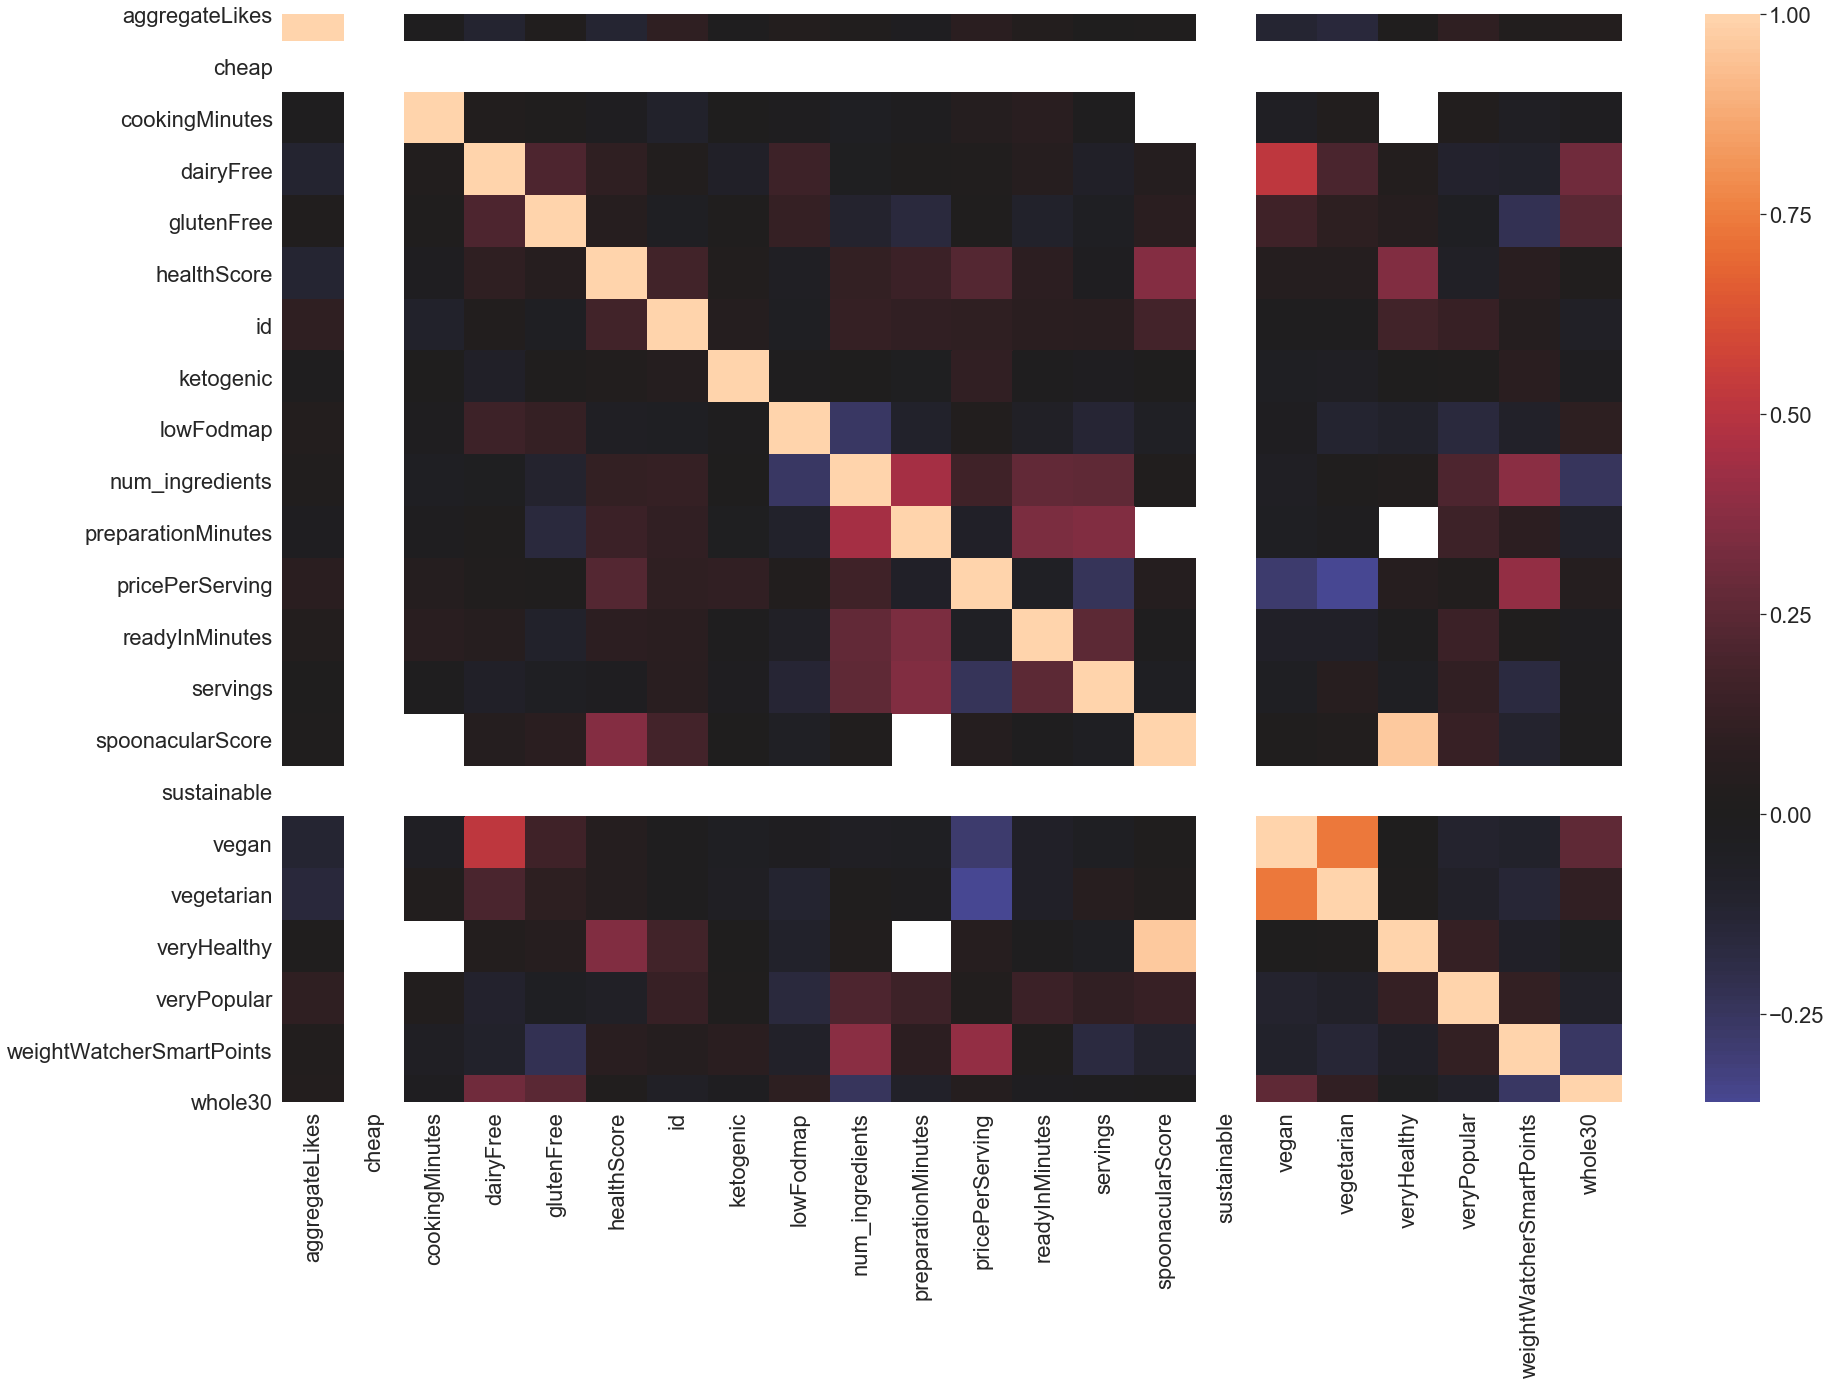

In [102]:
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig, ax = plt.subplots()
fig.set_size_inches(30,20)
ax = sns.heatmap(rand_df.corr(), center=0);
plt.show()

#### Save out the data as a .json file

In [85]:
#save out data to .json file for safe keeping

# import json
# with open('top_1000_recipes_info.json', 'w', encoding='utf-8') as f:
#     json.dump(top_1000_recipes_info, f, ensure_ascii=False, indent=4)